In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sciI
import scipy as sci
import scipy.ndimage
import scipy.stats


# Q1: Coin toss

Read section 2.1 of Sivia and recreate figure 2.3.

## (a)

Define the prior functions

In [3]:
def uniform_prior(H):
    if  H > 1 or H < 0:
        return 0
    return 1
    
first_prior = np.vectorize(uniform_prior)
    

def gaussian_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    
    sigma = 0.03
    mu = 0.5
    
    return np.exp(-np.power(H - mu, 2.) / (2 * np.power(sigma, 2.)))

second_prior =np.vectorize(gaussian_prior)


def third_prior(H):
    if  H > 1 or H < 0:
        return 0
    
    return (np.exp(-1000*H**2) + np.exp(-1000*(H - 1)**2))#/((sciI.quad(lambda x: np.exp(-1000*x**2) + np.exp(-1000*(x - 1)**2), 0, 1))[0])

third_prior=np.vectorize(third_prior)

### Bonus point

Why do we need to use np.vectorize here?

It seems that without it,logical if statements about the arrays that are used compeletely break down,because normally we can't compare numbers with arrays,also our output needed to be an array tself,not a number.

## (b)

Create an array for H, calculte the priors, normalize them and then plot them.

In [4]:
H = np.linspace(0, 1, num=1000, dtype=np.float128)

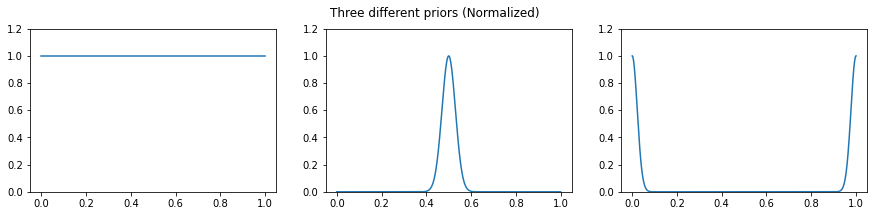

In [5]:
plt.figure(figsize=(15, 3))
plt.suptitle('Three different priors (Normalized)')

plt.subplot(1,3,1)
plt.plot(H,first_prior(H))
plt.ylim([0,1.2])
plt.subplot(1,3,2)
plt.plot(H,second_prior(H))
plt.ylim([0,1.2])
plt.subplot(1,3,3)
plt.plot(H,third_prior(H))
plt.ylim([0,1.2])

plt.show()

## (c)

Here we explicitly declared a data type for the array H. Although most of the times python does it for us, here was an example that we need to do it by hand to avoid round-off error. Find out what this error is and write a few lines about it (In Farsi or English) and explain what did we do to avoid it here. In other words, why did we use 'np.float128' exept just using 'float'?

You can also emit the data type decleration from the definition of H and see what happens in calculating the posterior.

Because before normalizing the data,they become so small that the computer considers them to be zero,giving more precision to our data negates this problem and those results are not considered zero anymore.

## (d)

Write a proper function to calculate the psterior for a given data and recreate the given plot.

In [6]:
data = [np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(i)) for i in range(4)]  
data.extend([np.random.choice([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], size=(2**i)) for i in range(2, 13)])

In [7]:
def posterior(data,k,H):
    ones = np.sum(data)
    zeros = np.sum(1-data)
    if k==1:
      return (first_prior(H)*((H)**ones)*((1-H)**zeros))/(sci.ndimage.maximum((first_prior(H)*((H)**ones)*((1-H)**zeros))))
    if k==2:
      return (second_prior(H)*((H)**ones)*((1-H)**zeros))/(sci.ndimage.maximum((second_prior(H)*((H)**ones)*((1-H)**zeros))))
    if k==3:
      return (third_prior(H)*((H)**ones)*((1-H)**zeros))/(sci.ndimage.maximum((third_prior(H)*((H)**ones)*((1-H)**zeros))))



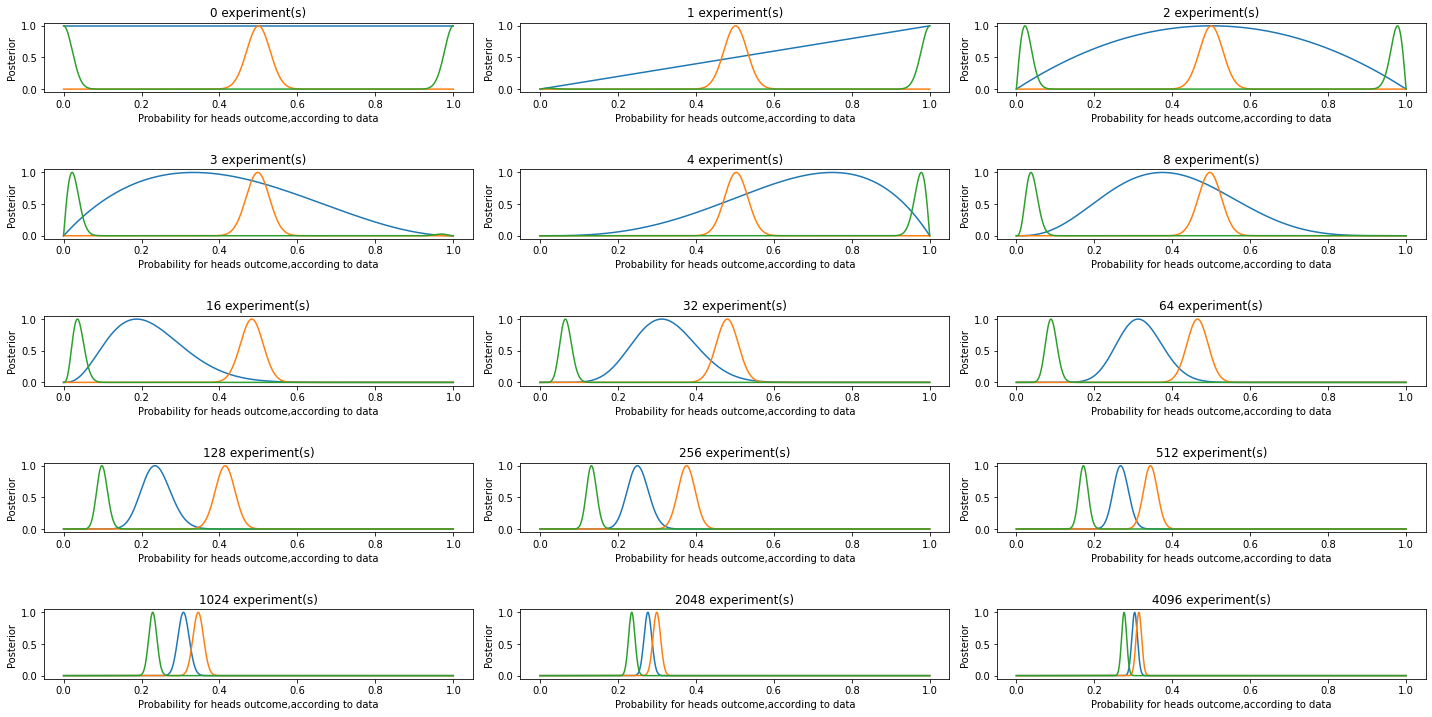

In [8]:
plt.figure(figsize=(20, 30))
for i in range(15):
  k=1
  plt.subplot(15,3,i+1)
  plt.xlabel("Probability for heads outcome,according to data")
  plt.ylabel("Posterior")
  if i<4:
    plt.title(str(i)+" experiment(s)")
  else:
    plt.title(str(2**(i-2))+" experiment(s)")
  while k<=3:
    plt.plot(H,posterior(data[i],k,H))
    k=k+1
    
    
plt.tight_layout(h_pad=3)
plt.show()

# Q2: Distributions and moments

## (a)

Write a function to calculate raw moments of a given distribution 

In [9]:
def RM(dist,n):
  return (np.sum((dist)**n))/(dist.size)

## (b)

Write a function to calculate central moments of a given distribution

In [10]:
def CM(dist,n):
  return (np.sum((dist-np.mean(dist))**n))/(dist.size)

## (c)

Using numpy.random, create a binomial (p=0.7, n=$30$), a Poisson ($\mu$ = 2.1) and a gaussian ($\mu$ = 2.1, $\sigma = 0.3$) distribution with size $10^6$ and calculate their first 3 raw and central moments

In [11]:
B=np.random.binomial(n=30,p=0.7,size=1000000)
P=np.random.poisson(lam=2.1,size=1000000)
G=np.random.normal(loc=2.1, scale=0.3,size=1000000)
All=np.array([B,P,G])
i=0

while i<3:
  k=0
  while k<3:
    if k==0:
      print("Raw moment of Binomial no "+str(i+1)+" is "+str(RM(All[k],i+1))+", The same Central moment of Binomial is: "+str(CM(All[k],i+1)))
    if k==1:
      print("Raw moment of Poisson no "+str(i+1)+" is "+str(RM(All[k],i+1))+", The same Central moment of Poisson is: "+str(CM(All[k],i+1)))
    if k==2:
      print("Raw moment of Gaussian no "+str(i+1)+" is "+str(RM(All[k],i+1))+", The same Central moment of Gaussian is: "+str(CM(All[k],i+1)))
    k=k+1
  i=i+1

Raw moment of Binomial no 1 is 21.003714, The same Central moment of Binomial is: 1.3371845852816477e-15
Raw moment of Poisson no 1 is 2.100595, The same Central moment of Poisson is: -2.1202595235081388e-16
Raw moment of Gaussian no 1 is 2.099488899245517, The same Central moment of Gaussian is: -7.671534518749468e-16
Raw moment of Binomial no 2 is 447.451538, The same Central moment of Binomial is: 6.295536206204002
Raw moment of Poisson no 2 is 6.515335, The same Central moment of Poisson is: 2.102835645975
Raw moment of Gaussian no 2 is 4.497818428596682, The same Central moment of Gaussian is: 0.08996479054153093
Raw moment of Binomial no 3 is 9660.149736, The same Central moment of Binomial is: -2.453680915639659
Raw moment of Poisson no 3 is 24.621499, The same Central moment of Poisson is: 2.101006788161289
Raw moment of Gaussian no 3 is 9.820839242830813, The same Central moment of Gaussian is: -4.0776959620850174e-05


## (d)

Using scipy.stats, calculate the first three moments of these distributions and check with the results from your own function. What does the function in scipy calculate? Raw moments or central moments?

In [12]:
from scipy import stats

In [13]:
i=0

while i<3:
  k=0
  while k<3:
    if k==0:
      print("Scipy calculated moment of Binomial no "+str(i+1)+" is "+str(stats.moment(All[k],i+1)))
    if k==1:
      print("Scipy calculated moment of Poisson no "+str(i+1)+" is "+str(stats.moment(All[k],i+1)))
    if k==2:
      print("Scipy calculated moment of Gaussian no "+str(i+1)+" is "+str(stats.moment(All[k],i+1)))
    k=k+1
  i=i+1
#It's very clear that the Scipy function calculates the Central moments.

Scipy calculated moment of Binomial no 1 is 0.0
Scipy calculated moment of Poisson no 1 is 0.0
Scipy calculated moment of Gaussian no 1 is 0.0
Scipy calculated moment of Binomial no 2 is 6.295536206204002
Scipy calculated moment of Poisson no 2 is 2.102835645975
Scipy calculated moment of Gaussian no 2 is 0.08996479054153093
Scipy calculated moment of Binomial no 3 is -2.45368091563966
Scipy calculated moment of Poisson no 3 is 2.101006788161289
Scipy calculated moment of Gaussian no 3 is -4.077695962085009e-05


# Q3: Radioactive decay

The Poisson distribution is often used to describe situations in which an event occurs repeatedly at a constant rate of probability. An application of this distribution involves the decay of radioactive samples, but only in the approximation that the decay rate is slow enough that depletion in the population of the decaying species can be neglected.

Now suppose we have a data set showing the number of $\alpha$ particles emmited in 7.5 sec intervals:

## (a)

Load the provided data into a pandas data frame and show the data and then plot it's PDF.

In [6]:
from pandas import DataFrame, read_csv

In [7]:
Decay=np.loadtxt("data.txt")
Frame=DataFrame(Decay,columns=["time passed","number of events"])
Frame

,time passed,number of events
0,7.5,232.0
1,15.0,240.0
2,22.5,245.0
3,30.0,226.0
4,37.5,223.0
...,...,...
2043,15330.0,265.0
2044,15337.5,220.0
2045,15345.0,252.0
2046,15352.5,229.0


## (b)

Calculate total number of decays and the average number of decays after each time interval. Then add the data to the Pandas DataFrame and show it. Then save the data to file 'new_data.txt'.

In [29]:
#Total:
Sum=Frame["number of events"].sum()
print(Frame["number of events"].sum())
#Average:
Avg=Frame["number of events"].mean()
print(Frame["number of events"].mean())
New=Frame.append(DataFrame({"number of events":["Total number of decays are "+str(Sum)],"time passed":["Average number of decays are "+str(Avg)]}))
New
np.savetxt(r'new_data.txt', New.values, fmt='%s')


485193.0
236.91064453125


## (c)

Use a unifor prior and do the same analysis as question 1 to get the mean decay number per interval. Plot the diagrams as well. (Beware that this time we have a Poisson distribution rather than a binomial one)

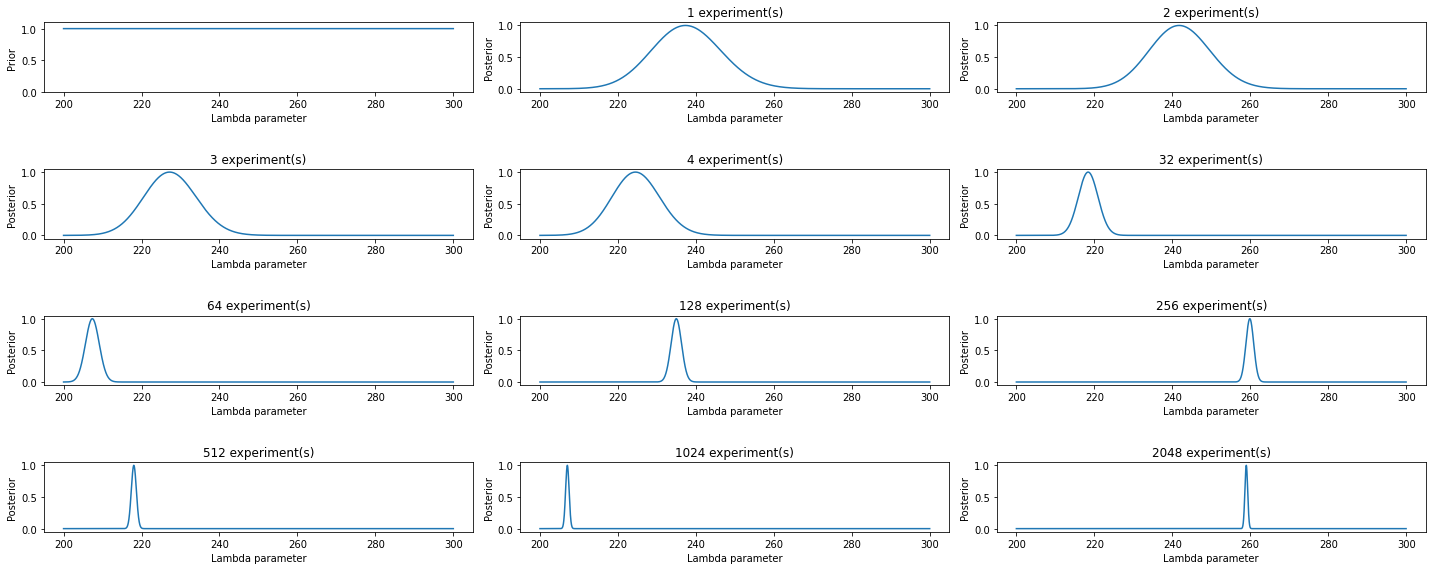

In [ ]:
#Why even bother defining the unform prior? It's just multuplies everything by 1.
#We should expect Lambda to peak around 236
lam=np.arange(200,300,step=0.01,dtype=np.float128)
from decimal import Decimal, getcontext

def Poi(lam1,k):
  k=int(k)
  return np.exp(( np.log( (lam1**k) * np.exp(-lam) ) - (scipy.special.gammaln(k)) )) / np.exp((sci.ndimage.maximum(np.log( (lam1**k) * np.exp(-lam) ) - (scipy.special.gammaln(k)))))
VPoi=np.vectorize(Poi)

plt.figure(figsize=(20, 30))
i=1
plt.subplot(15,3,1)
plt.xlabel("Lambda parameter")
plt.ylabel("Prior")
plt.ylim(0,1.1)
plt.plot(lam,np.ones(len(lam)))
while i<12:
  prob=Poi(lam,Frame.loc[0,"number of events"])
  k=0
  plt.subplot(15,3,i+1)
  plt.xlabel("Lambda parameter")
  plt.ylabel("Posterior")
  if i<5:
    
    while k<=i:
      prob=prob*Poi(lam,Frame.loc[i,"number of events"])/sci.ndimage.maximum(prob*Poi(lam,Frame.loc[i,"number of events"]))
      k=k+1
    plt.plot(lam,prob)
    plt.title(str(i)+" experiment(s)")
  else:
    while k<=2**i:
      prob=prob*Poi(lam,Frame.loc[i,"number of events"])/sci.ndimage.maximum(prob*Poi(lam,Frame.loc[i,"number of events"]))
      k=k+1
    plt.plot(lam,prob)
    plt.title(str(2**i)+" experiment(s)")
    
  i=i+1
plt.tight_layout(h_pad=3)
plt.show()

## (d)

Use two different priors of your choise and repeat the analysis. Which of these three priors leads to an answer sooner?

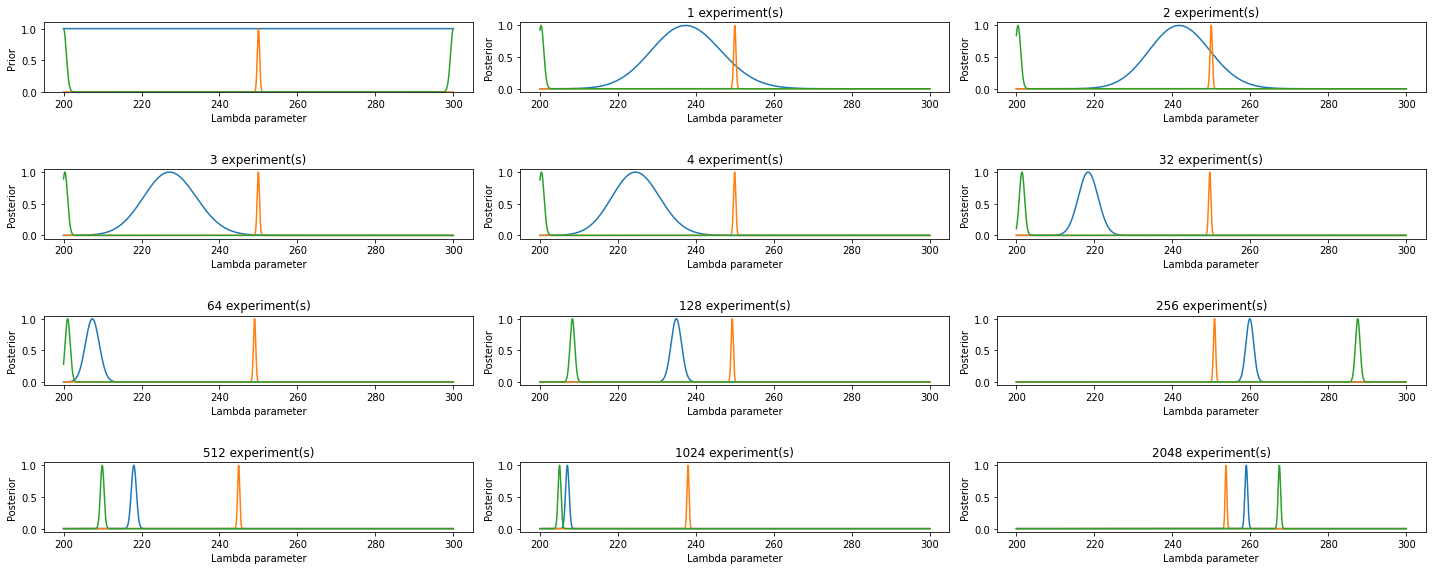

In [14]:
lam=np.arange(200,300,step=0.01,dtype=np.float128)
def Poi(lam1,k):
  k=int(k)
  return np.exp(( np.log( (lam1**k) * np.exp(-lam) ) - (scipy.special.gammaln(k)) )) #/ np.exp((sci.ndimage.maximum(np.log( (lam1**k) * np.exp(-lam) ) - (scipy.special.gammaln(k)))))
def gaussian_prior(H):
    if  H > 300 or H < 200:
        return 0
    sigma = 0.3
    mu = 250    
    return np.exp(-np.power(H - mu, 2.) / (2 * np.power(sigma, 2.)))
second_prior =np.vectorize(gaussian_prior)

def third_prior(H):
    if  H > 300 or H < 200:
        return 0   
    return (np.exp(-(H-200)**2) + np.exp(-(H - 300)**2))#/((sciI.quad(lambda x: np.exp(-1000*x**2) + np.exp(-1000*(x - 1)**2), 0, 1))[0])
third_prior=np.vectorize(third_prior)

plt.figure(figsize=(20, 30))
i=1
l=0
plt.subplot(15,3,1)
plt.xlabel("Lambda parameter")
plt.ylabel("Prior")
plt.ylim(0,1.1)
plt.plot(lam,np.ones(len(lam)))
plt.plot(lam,second_prior(lam))
plt.plot(lam,third_prior((lam)))
while i<12:
  prob=Poi(lam,Frame.loc[0,"number of events"])
  k=0
  l=0
  plt.subplot(15,3,i+1)
  plt.xlabel("Lambda parameter")
  plt.ylabel("Posterior")
  if i<5:
    
    while k<=i:
      prob=prob*Poi(lam,Frame.loc[i,"number of events"])/sci.ndimage.maximum(prob*Poi(lam,Frame.loc[i,"number of events"]))
      k=k+1
    
    plt.plot(lam,prob)
    plt.plot(lam,prob*second_prior(lam)/sci.ndimage.maximum(prob*second_prior(lam)))
    plt.plot(lam,prob*third_prior(lam)/sci.ndimage.maximum(prob*third_prior(lam)))  
    plt.title(str(i)+" experiment(s)")
  else:
    while k<=2**i:
      prob=prob*Poi(lam,Frame.loc[i,"number of events"])/sci.ndimage.maximum(prob*Poi(lam,Frame.loc[i,"number of events"]))
      k=k+1
    plt.plot(lam,prob)
    plt.plot(lam,prob*second_prior(lam)/sci.ndimage.maximum(prob*second_prior(lam)))
    plt.plot(lam,prob*third_prior(lam)/sci.ndimage.maximum(prob*third_prior(lam)))  
    plt.title(str(2**i)+" experiment(s)")
    
  i=i+1
plt.tight_layout(h_pad=3)
plt.show()
#With a very strong bias in the third hypothesis,we see that data has a small impact on our resault. It seems that a gaussian prior was the best one,leading to the closest resault.

## (e)

Now that you have the average decay per time interval, calculate the half life of this radioactive element (Suppose that the sample is large enough not to lose a noticable fraction of the particles in the span of the experiment). Can find out what this element is?

In [ ]:
#Without knowing the size of our sample,how can we find a half life?We dont know what fraction of particles decayed,shoudn't a 10 Kg sample decay 10 times more than a 1 Kg sample?

# Bonus question

Do an error analysis and report how sure are you about the number you derived for the half life of the element.